# Question 1: (1 pt)
Machine learning models can improve clinical decision making because

    1.	They can be easily programmed in many programming languages 
    2.	They do not require iterative computations
    3.	They use decision trees
    4.	They identify data-driven, objective decision logic (+)


# Question 2: (1 pt)
By limiting the depth of the decision tree we make sure that 

    1.	It does not overfit the data (+)
    2.	It uses as many features as possible
    3.	It provides the best fit into the data
    4.	It can be used with random forest models


# Question 3: (1 pt)
One of the main advantages of decision tree model is:

    1.	Stability
    2.	Using linear regression
    3.	Representing interpretable decision logic (+)
    4.	Not overfitting the data


# Question 4: (1 pt)
Forest models are built by 
    
    1.	Averaging linear regressions
    2.	Averaging decision trees (+)
    3.	Averaging randomly-chosen leaves from the same large decision tree
    4.	Selecting the largest tree from a randomly generated set of decision trees


# 2	Solve data problems 
In this part, we will take a bit more time to explore the Wisconsin Breast Cancer dataset, described in the class. Load the dataset using the file provided with this homework . Use ‘diagnosis’ as your target variable Y to be predicted (you can replace Malignant by 1, and Benign by 0, thus predicting cancer malignancy). Make sure you remove ‘diagnosis’ and ‘id’ from the feature variables X.
Note that there are many types of model accuracy metrics, they all can be found in sklearn.metrics.


In [31]:
import pandas as pd

In [32]:
df = pd.read_excel('datasets/data.xlsx')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [33]:
X = df.drop(['id', 'diagnosis'],axis=1)
y = (df['diagnosis'] == 'M').astype(int)

In [34]:
y.unique()

array([1, 0])

## Greedy model selection algorithm
    1.	Find the best one-feature model (try all one-feature models, and select the one with the lowest error e). This is our best feature F1.
    2.	Using F1 from the first step, try adding one more feature to it (from all features you have left), to find the best 2-feature model (F1, F2)
    3.	Similarly, keep adding more features: F3, F4, F5 – to the features from the previous step


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score, recall_score

In [47]:
model = LogisticRegression()

In [49]:
model = LogisticRegression()
chosen_features = []
n_features = 3
for i in range(n_features):
    cands = []
    for feat in set(X.columns) - set(chosen_features):
        X0 = X[chosen_features + [feat]]
        model.fit(X0,y)
        e = log_loss(y, model.predict(X0))
        cands.append((feat, e, accuracy_score(y, model.predict(X0))))
    best = min(cands, key=lambda x: x[1])
    chosen_features.append(best[0])
    print(chosen_features, 'acc =', round(best[2],2))

['perimeter_worst'] acc = 0.92
['perimeter_worst', 'texture_worst'] acc = 0.95
['perimeter_worst', 'texture_worst', 'radius_mean'] acc = 0.96


# Question 5:  (5 pts)
Model A
Using LogisticRegression model and our greedy model selection algorithm that we have used previously (see the insert below), find the best 3-feature model. Use sklearn.metrics.accuracy_score  to select the model with the highest accuracy. Which one of the features below appears in this model?
    
    1.	compactness_worst 
    2.	fractal_dimension_se
    3.	smoothness_se 
    4.	concave points_mean 
    5.	perimeter_worst (+)


In [64]:
model = LogisticRegression()
chosen_features = []
n_features = 3
for i in range(n_features):
    cands = []
    for feat in set(X.columns) - set(chosen_features):
        X0 = X[chosen_features + [feat]]
        model.fit(X0,y)
        e = log_loss(y, model.predict(X0))
        cands.append((feat, e, accuracy_score(y, model.predict(X0))))
    best = min(cands, key=lambda x: x[1])
    chosen_features.append(best[0])
    print(chosen_features, 'acc =', round(best[2],5))

['perimeter_worst'] acc = 0.91916
['perimeter_worst', 'texture_worst'] acc = 0.95079
['perimeter_worst', 'texture_worst', 'radius_mean'] acc = 0.95606


# Question 6:  (3 pts)
Model B
Predicting cancer malignancy, one would definitely want to avoid false negatives: malignant cancer cases erroneously classified by the model as benign. 
Recall (or Sensitivity, https://en.wikipedia.org/wiki/Precision_and_recall) is another quality metric, which determines how well a model can avoid false negatives. So let’s use the above greedy selection, and change model selection metric from accuracy to recall (sklearn.metrics.recall_score). 
Rerun the greedy code with this metric to select the 2-feature model with the highest recall. 
How many features in this new model are the same as in the model A above?

    1.	None (+)
    2.	One
    3.	Two
    4.	Three

Checkpoint: Model recall score should be close to 0.919811
Another interesting checkpoint – try running this algorithm to select the best 3-, 4-, 5-feature model, and you will see, that the best recall value is not changing; and going higher will definitely result in an overfit. So we have an interesting case when 2 features get all the job done.


In [65]:
model = LogisticRegression()
chosen_features = []
n_features = 3
for i in range(n_features):
    cands = []
    for feat in set(X.columns) - set(chosen_features):
        X0 = X[chosen_features + [feat]]
        model.fit(X0,y)
        e = log_loss(y, model.predict(X0))
        cands.append((feat, e, recall_score(y, model.predict(X0))))
    best = min(cands, key=lambda x: x[1])
    chosen_features.append(best[0])
    print(chosen_features, 'acc =', round(best[2],2))

['perimeter_worst'] acc = 0.87
['perimeter_worst', 'texture_worst'] acc = 0.92
['perimeter_worst', 'texture_worst', 'radius_mean'] acc = 0.92


# Question 7:  (6 pts)
Model C
Regression is great, but we want to find a very simple model any physician can use. So let’s consider building a decision tree model. To develop something very interpretable that can be used by humans, let’s also limit the number of decision tree leaves to 3 by using max_leaf_nodes parameter in DecisionTreeClassifier() . 
As always, train the model on the entire dataset. Make a plot of the resulting model tree:

    fig = plt.figure(figsize=(15,10))
        _ = tree.plot_tree(model, 
                           feature_names=list(X.columns),  
                           class_names=['B','M'],
                           rounded = True,
                           fontsize = 12,
                           filled=True)

                           
We have a patient with the following features

    radius_worst<12 
    radius_mean>9
    concave_points_worst<0.1

Looking at this tree plot only, answer the following question:
What does this model tell us about the patient cancer classification?

    1.	Benign (+)
    2.	Malignant
    3.	Equally probable to be Benign or Malignant

Checkpoint: Model accuracy score should be close to 0.94024

3)  Do not use any other parameters

In [59]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

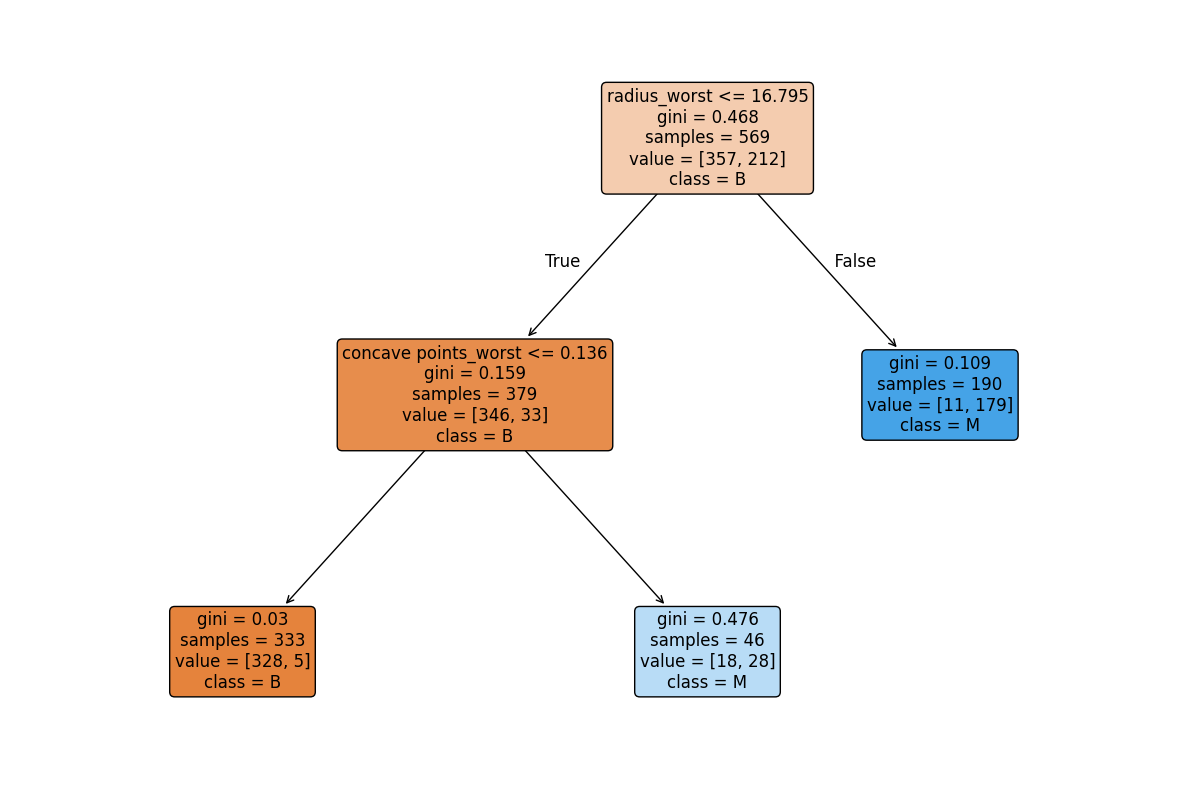

In [66]:
model = DecisionTreeClassifier(max_leaf_nodes=3)
model.fit(X,y)
fig = plt.figure(figsize=(15,10)) 
_ = plot_tree(model, 
                           feature_names=list(X.columns),  
                           class_names=['B','M'],
                           rounded = True,
                           fontsize = 12,
                           filled=True)


In [67]:
accuracy_score(y, model.predict(X))

0.9402460456942003

# Question 8:  (4 pts)
Model D
Now, let’s build a really small random forest, with only 10 trees, setting tree maximum depth  to 3. Compute the accuracy score of this forest (Model D) to the models A and C above. Which of the three models produced the most accurate result?

    1.	A
    2.	C
    3.	D (+)
    4.	All three models have the same accuracy
    
Note: Random forest uses random seeding to create its trees, so it may return slightly different results with each model run. Run it a few times comparing to the other models, and report most frequent result. 

4) Set these parameter values in RandomForestClassifier();


In [69]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, max_depth=3)
model.fit(X,y)
accuracy_score(y, model.predict(X))

0.9753954305799648